In [1]:
import numpy as np
import pandas as pd
# import deeplabcut
# import torch
from pathlib import Path

In [16]:
from utils.vis import *
from utils.postprocessing import *

import importlib
import utils.vis
import utils.postprocessing

importlib.reload(utils.vis)
importlib.reload(utils.postprocessing)

<module 'utils.postprocessing' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\utils\\postprocessing.py'>

In [7]:
# Load data
h5_file = 'processed_vids/vid1_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
pose_data = pd.read_hdf(h5_file)

pose_data = pose_data.sort_index(axis=1)

# Get error masks

In [12]:
# After running detect_pose_errors
paws = ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']
error_details = detect_pose_errors(
    pose_data,
    bodyparts=paws,
    velocity_threshold=50,
    min_likelihood=0.0,
    max_distance=300
)
error_details

,front_left_paw_velocity,front_left_paw_likelihood,front_left_paw_distance,front_left_paw_error,front_right_paw_velocity,front_right_paw_likelihood,front_right_paw_distance,front_right_paw_error,back_left_paw_velocity,back_left_paw_likelihood,back_left_paw_distance,back_left_paw_error,back_right_paw_velocity,back_right_paw_likelihood,back_right_paw_distance,back_right_paw_error
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
1222,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
1223,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
1224,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True


c:\Users\jexia\OneDrive\Documents\projects\datafawn\utils\vis.py:392: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


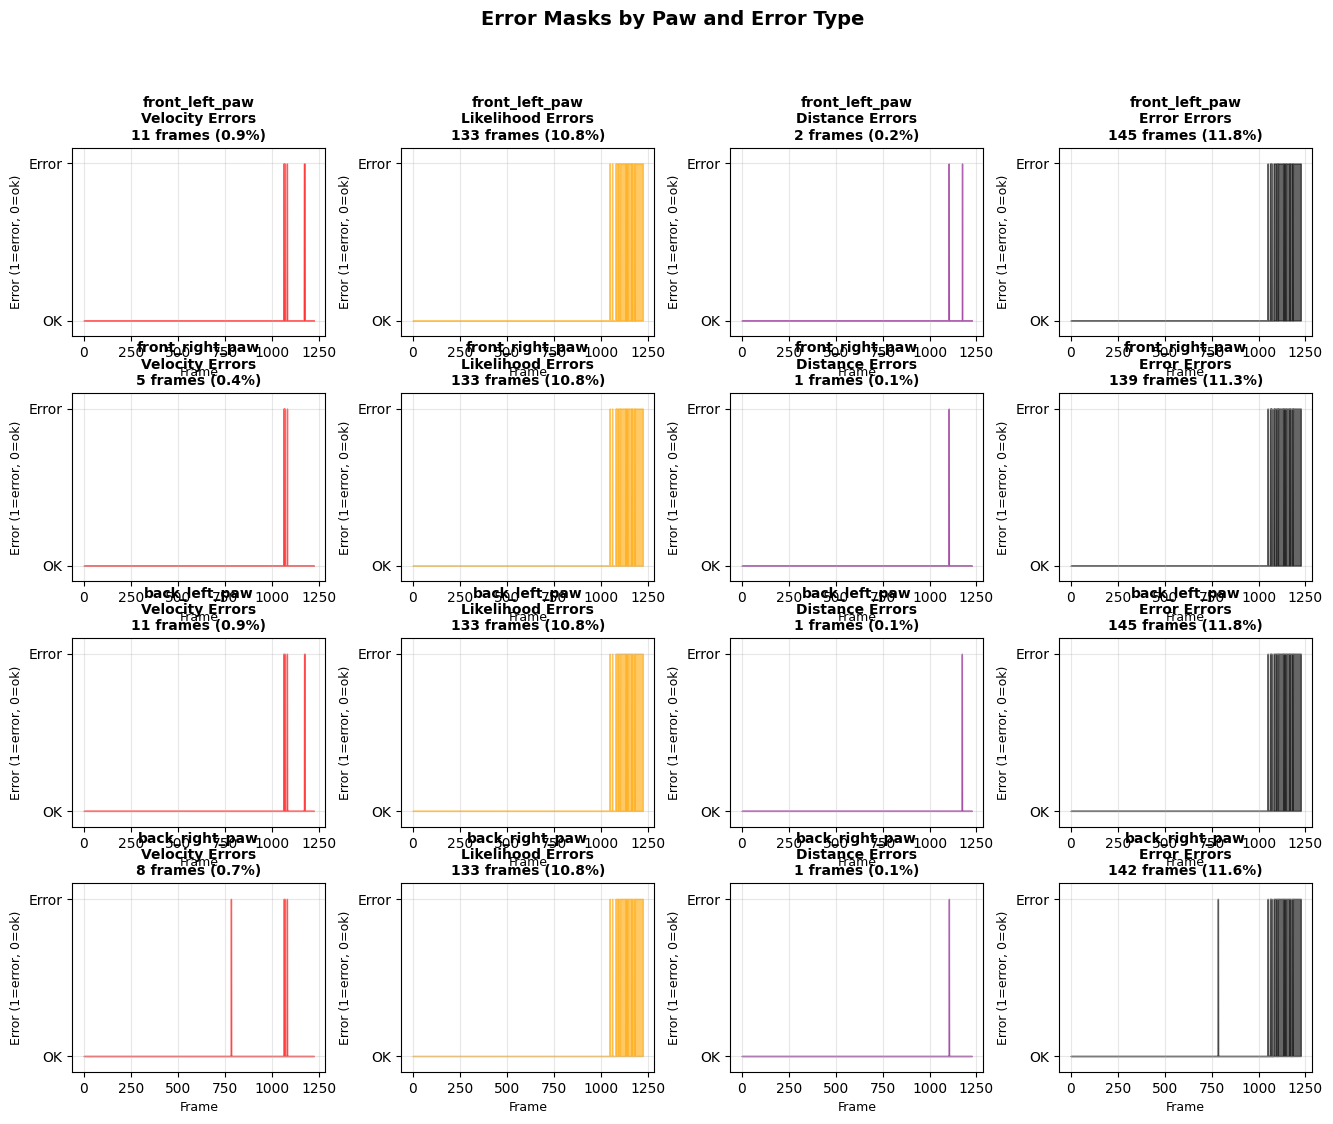

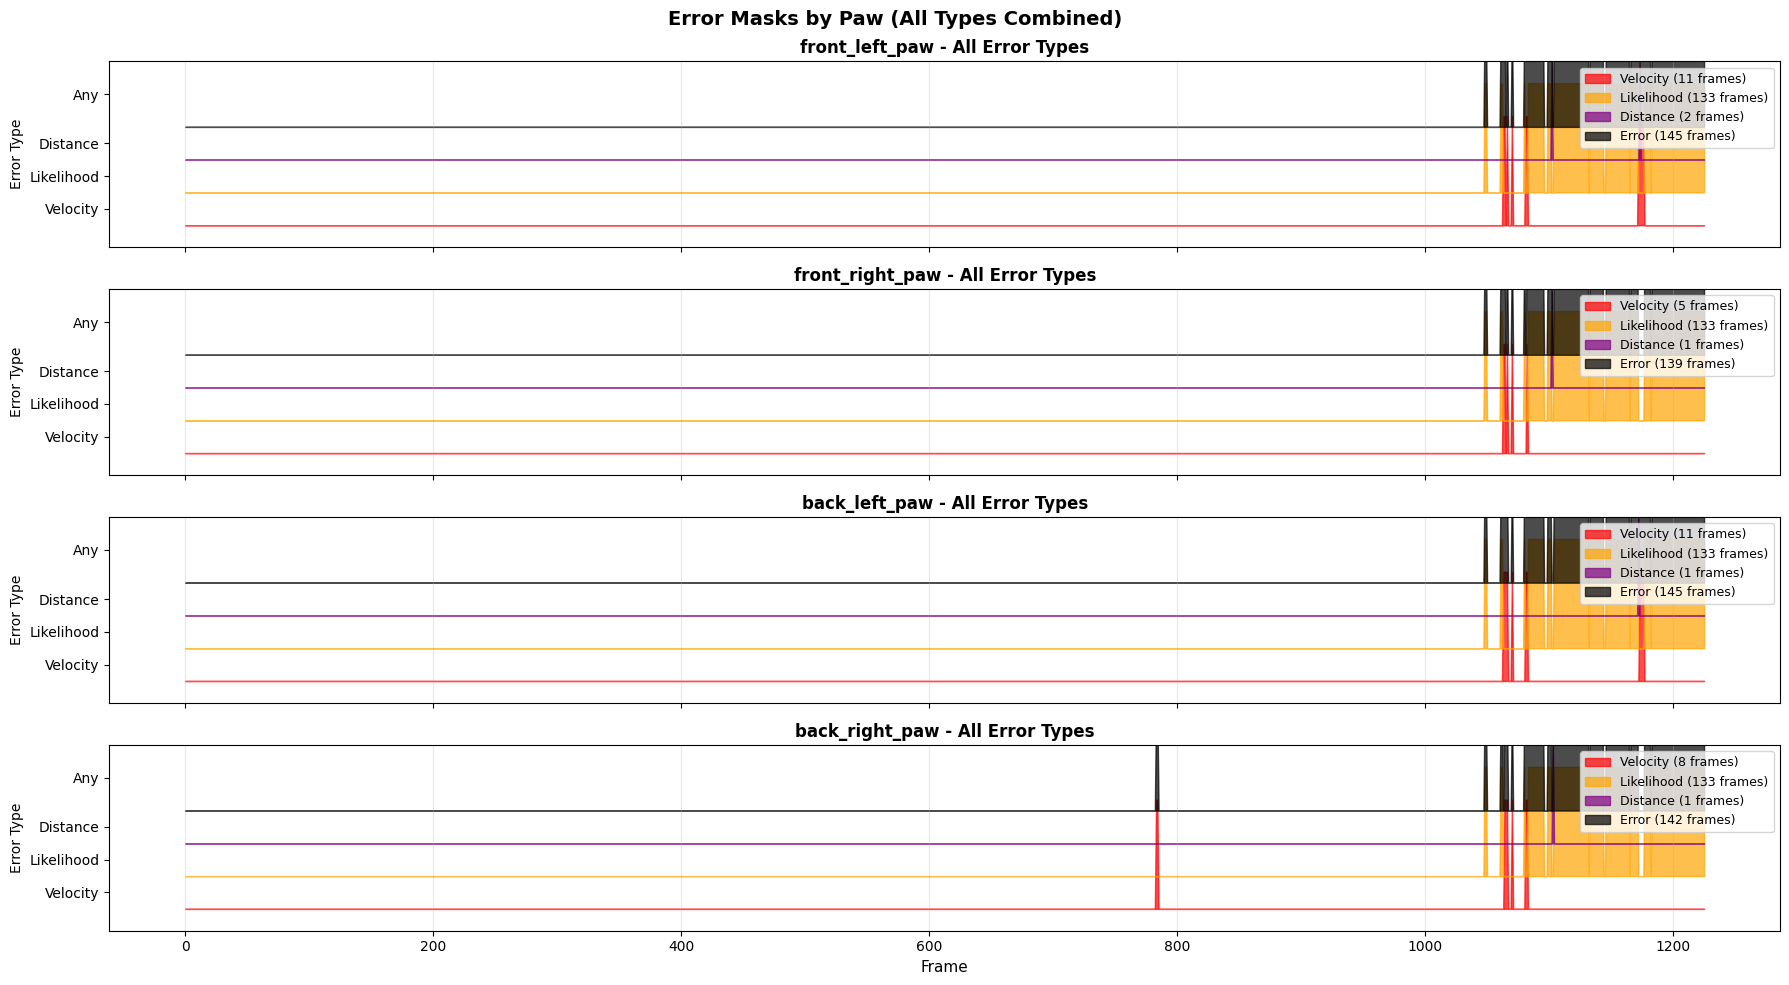


Error Summary Statistics:
            Paw Error Type  Count  Percentage
 front_left_paw   Velocity     11    0.897227
 front_left_paw Likelihood    133   10.848287
 front_left_paw   Distance      2    0.163132
 front_left_paw      Error    145   11.827080
front_right_paw   Velocity      5    0.407830
front_right_paw Likelihood    133   10.848287
front_right_paw   Distance      1    0.081566
front_right_paw      Error    139   11.337684
  back_left_paw   Velocity     11    0.897227
  back_left_paw Likelihood    133   10.848287
  back_left_paw   Distance      1    0.081566
  back_left_paw      Error    145   11.827080
 back_right_paw   Velocity      8    0.652529
 back_right_paw Likelihood    133   10.848287
 back_right_paw   Distance      1    0.081566
 back_right_paw      Error    142   11.582382


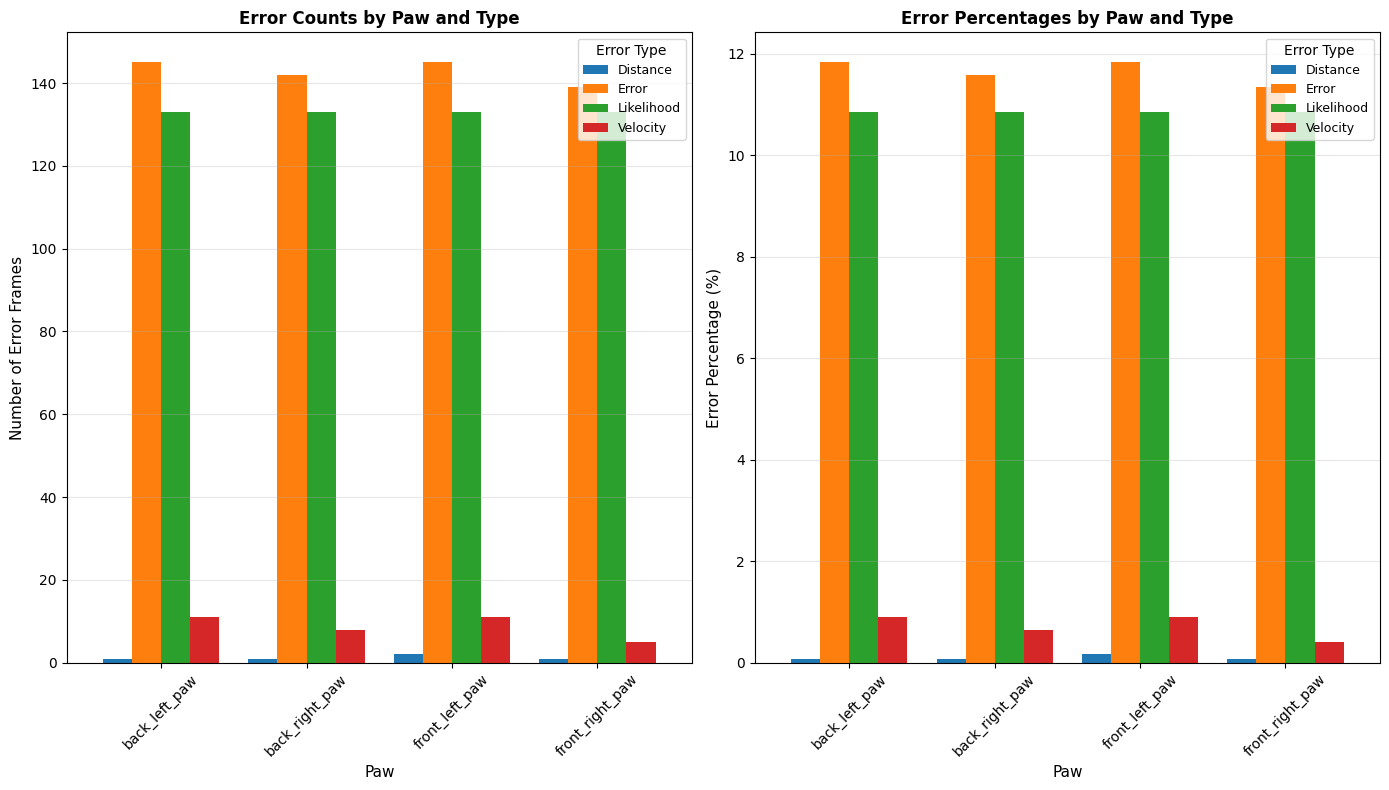

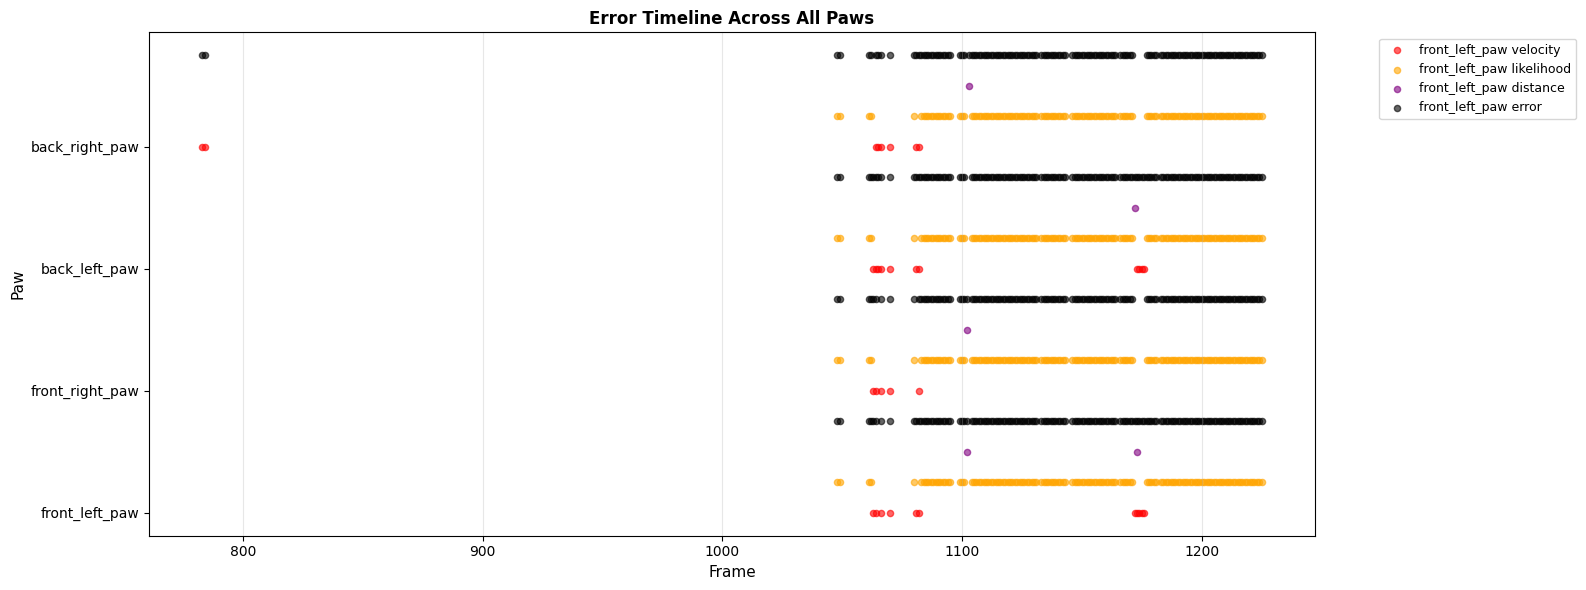

In [17]:


# Visualization 1: Separate plots for each paw and error type
fig1 = visualize_error_masks(error_details, paws)
plt.show()

# Visualization 2: Combined view - all error types per paw
fig2 = visualize_error_masks_combined(error_details, paws)
plt.show()

# Visualization 3: Summary statistics
fig3, stats_df = visualize_error_summary(error_details, paws)
plt.show()

# Visualization 4: Timeline view
fig4 = visualize_error_timeline(error_details, paws)
plt.show()

In [18]:
error_details

,front_left_paw_velocity,front_left_paw_likelihood,front_left_paw_distance,front_left_paw_error,front_right_paw_velocity,front_right_paw_likelihood,front_right_paw_distance,front_right_paw_error,back_left_paw_velocity,back_left_paw_likelihood,back_left_paw_distance,back_left_paw_error,back_right_paw_velocity,back_right_paw_likelihood,back_right_paw_distance,back_right_paw_error
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
1222,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
1223,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
1224,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True


In [26]:
error_mask = error_details[['front_left_paw_error', 'front_right_paw_error', 'back_left_paw_error', 'back_right_paw_error']].copy()
error_mask.columns = [col.replace('_error', '') for col in error_mask.columns]

error_mask

,front_left_paw,front_right_paw,back_left_paw,back_right_paw
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1221,True,True,True,True
1222,True,True,True,True
1223,True,True,True,True
1224,True,True,True,True


# Perform Normalization

In [19]:
pose_data_with_rel = paw_to_relative_position(pose_data, append_to_df=True)

Dataframe with relative positions created:
Original shape: (1226, 117)
New shape: (1226, 129)

New bodyparts added:
['back_left_paw_rel', 'back_right_paw_rel', 'front_left_paw_rel', 'front_right_paw_rel']


In [20]:
pose_data_with_rel

scorer      superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_  \
individuals                                                     animal0   
bodyparts                                                     back_base   
coords                                                       likelihood   
0                                                     0.187797            
1                                                     0.171946            
2                                                     0.152684            
3                                                     0.243810            
4                                                     0.224923            
...                                                        ...            
1221                                                 -1.000000            
1222                                                 -1.000000            
1223                                                 -1.000000            
1224                                                 -1.000000            
1225                                                 -1.000000            

scorer                                                                  \
individuals                                                              
bodyparts                             back_end                           
coords                x           y likelihood           x           y   
0            380.000000  332.000000   0.859222  224.000000  362.000000   
1            389.742188  338.554688   0.913442  228.304688  373.148438   
2            394.312500  344.382812   0.836711  233.062500  381.898438   
3            380.460938  358.687500   0.877416  227.304688  393.937500   
4            383.218750  372.218750   0.878291  232.093750  407.093750   
...                 ...         ...        ...         ...         ...   
1221          -1.000000   -1.000000  -1.000000   -1.000000   -1.000000   
1222          -1.000000   -1.000000  -1.000000   -1.000000   -1.000000   
1223          -1.000000   -1.000000  -1.000000   -1.000000   -1.000000   
1224          -1.000000   -1.000000  -1.000000   -1.000000   -1.000000   
1225          -1.000000   -1.000000  -1.000000   -1.000000   -1.000000   

scorer                                                            ...  \
individuals                                                       ...   
bodyparts   back_left_knee                         back_left_paw  ...   
coords          likelihood           x           y    likelihood  ...   
0                 0.508749  266.000000  422.000000      0.281677  ...   
1                 0.642978  262.898438  425.039062      0.553271  ...   
2                 0.466613  249.187500  440.851562      0.202996  ...   
3                 0.625021  244.976562  452.687500      0.358248  ...   
4                 0.534443  214.656250  471.031250      0.252075  ...   
...                    ...         ...         ...           ...  ...   
1221             -1.000000   -1.000000   -1.000000     -1.000000  ...   
1222             -1.000000   -1.000000   -1.000000     -1.000000  ...   
1223             -1.000000   -1.000000   -1.000000     -1.000000  ...   
1224             -1.000000   -1.000000   -1.000000     -1.000000  ...   
1225             -1.000000   -1.000000   -1.000000     -1.000000  ...   

scorer                                                                  \
individuals                                                              
bodyparts      tail_end throat_base                         throat_end   
coords                y  likelihood           x           y likelihood   
0            200.000000    0.104913  410.000000  338.000000   0.071436   
1            211.710938    0.086224  418.570312  361.617188   0.044909   
2            221.117188    0.103398  405.062500  365.820312   0.041861   
3            458.562500    0.064214  392.242188  393.937500   0.055977   
4            244.343750    0.105481  406.468750  383.843750   0.055029   
.

# Zeni Algorithm

In [55]:
import importlib

from utils.zeni import *
from utils.vis import *

import utils.zeni
import utils.vis

importlib.reload(utils.zeni)
importlib.reload(utils.vis)

<module 'utils.vis' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\utils\\vis.py'>

**From manual counting**:
- Front right leg:
    - 5 steps in beginning
        - first 4 are slighlty covered
    - 4 at the end
        - first one is a pivoting step

- Front left leg
    - 

In [45]:
strikes = zeni_algorithm(
    pose_data_with_rel,
    window_size=5,
    min_contact_duration=3,
    velocity_threshold=10,
    error_mask=error_mask
)
strikes


{'front_left_paw': [19,
  64,
  90,
  104,
  125,
  134,
  353,
  744,
  775,
  784,
  845,
  949,
  1044],
 'front_right_paw': [88, 116, 351, 797, 897],
 'back_left_paw': [758],
 'back_right_paw': [26,
  68,
  88,
  103,
  185,
  353,
  475,
  571,
  665,
  758,
  795,
  825,
  842,
  899,
  1005,
  1054,
  1074]}

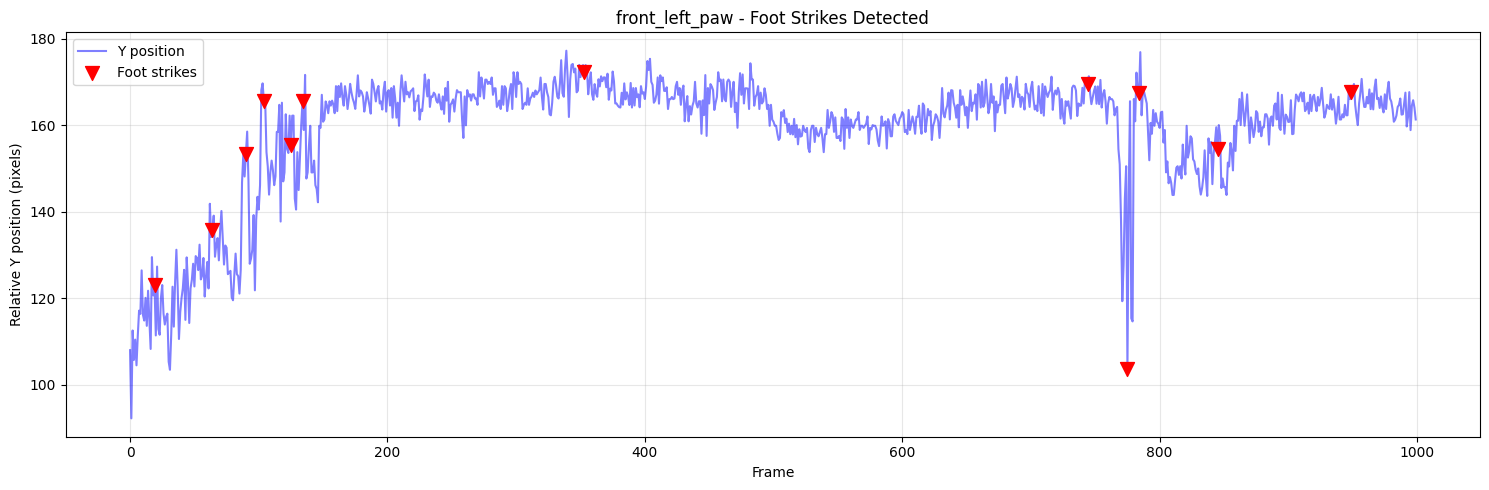

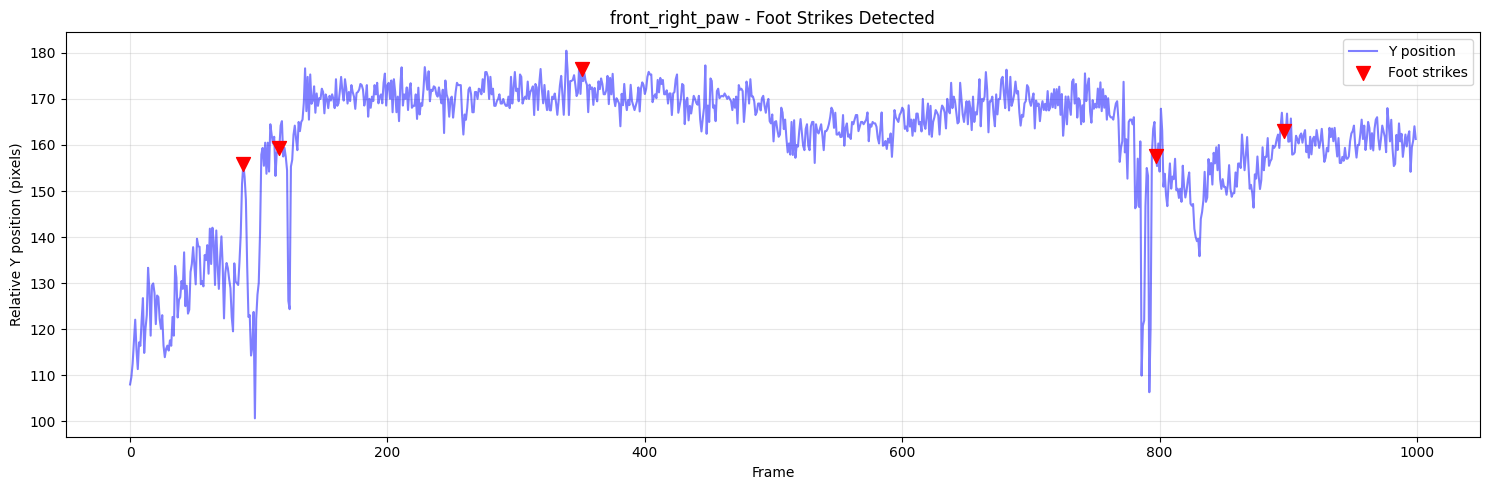

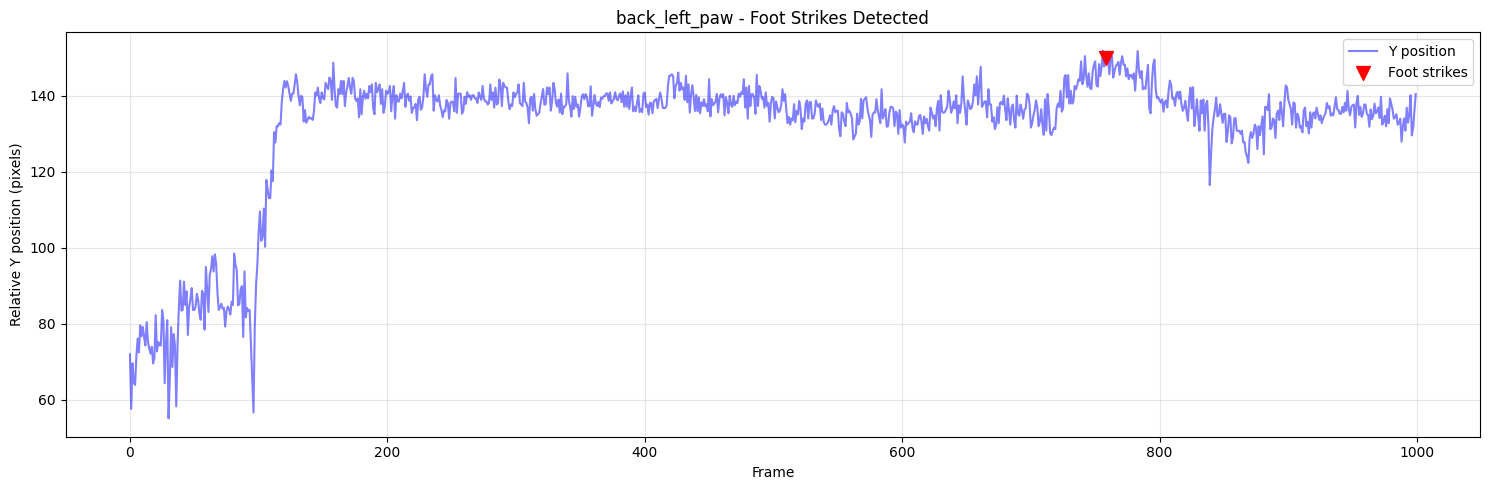

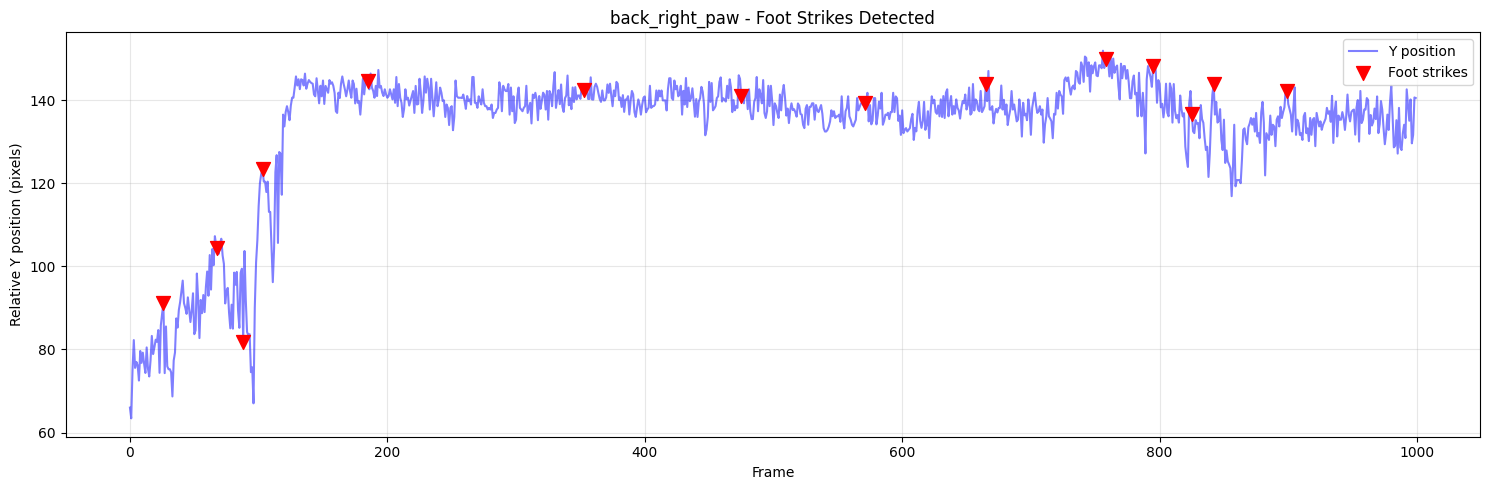

In [57]:
# Plot results for each paw
for paw in ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']:
    plot_strikes(pose_data_with_rel, strikes, paw, 0, 1000)